In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import zscore
from windrose import WindroseAxes

In [2]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv") 

In [3]:
df.sample(5)

Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
102922  2022-01-09 11:23  692.9  602.0  220.3  797.6  775.9  31.2  52.3  0.8   
254561  2022-04-24 18:42   27.3    0.3   26.4   36.7   34.6  35.0  46.9  1.4   
369299  2022-07-13 11:00  559.4    3.3  555.6  517.8  509.7  26.1  88.3  3.3   
81618   2021-12-25 16:19  311.1  293.9  167.0  344.1  329.2  33.4  39.6  2.5   
274551  2022-05-08 15:52  132.8    0.4  132.4  144.7  137.6  27.3  80.3  1.6   

        WSgust  WSstdev     WD  WDstdev    BP  Cleaning  Precipitation  TModA  \
102922     1.6      0.6    5.3     33.4  1000         0            0.0   57.9   
254561     1.9      0.4  200.4     12.0   996         0            0.0   36.3   
369299     4.1      0.4  197.6     14.2  1004         0            0.0   38.6   
81618      3.1      0.5  231.1     12.0   997         0            0.0   46.4   
274551     2.4      0.4  195.7     28.2   997         0            0.0   32.5   

        TModB  Comments  
102922   54.0       NaN  
254561   36.4       NaN  
369299   39.4       NaN  
81618    49.3       NaN  
274551   32.4       NaN

In [4]:
# To look at the information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [5]:
# show some stats about the dataframe
df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.100000      68.700000       0.000000   
50%         3.400000      25.300000      85.400000       0.800000   
75%       345.400000      29.400000      96.700000       2.000000   
max      1473.000000      39.900000     100.000000      19.200000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        1.691606       0.363823     133.044668       7.172220   
std         1.617053       0.295000     114.284792       7.535093   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.600000       0.400000     161.500000       6.200000   
75%         2.600000       0.600000     234.100000      12.000000   
max        23.900000       4.100000     360.000000      98.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      999.876469       0.000967       0.004806      32.504263   
std         2.104419       0.031074       0.047556      12.434899   
min       993.000000       0.000000       0.000000      10.700000   
25%       999.000000       0.000000       0.000000      23.500000   
50%      1000.000000       0.000000       0.000000      26.600000   
75%      1001.000000       0.000000       0.000000      40.900000   
max      1006.000000       1.000000       2.400000      72.800000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.593091       NaN  
std        12.009161       NaN  
min        11.100000       NaN  
25%        23.800000       NaN  
50%        26.900000       NaN  
75%        41.300000       NaN  
max        70.400000       NaN

In [6]:
# To get the count of null values in each column
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:
# To get the percentage of null values in each column and filter columns with more than 5% null values
null_percent = df.isna().mean() * 100
cols_over_5pct_nulls = null_percent[null_percent > 5].index.tolist()
print(cols_over_5pct_nulls)

['Comments']


In [8]:
# drop the comments column cuz it has 100% null values
df.drop(columns=['Comments'], inplace=True)

In [9]:
# Check for incorrect entries(negative values) in main columns and list them
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
negative_counts = df[columns_to_check].lt(0).sum()
print("Number of negative values per column:\n", negative_counts[negative_counts > 0])

Number of negative values per column:
 GHI    261135
DNI    266352
DHI    263128
dtype: int64


In [10]:
df[['GHI', 'DNI', 'DHI']] = df[['GHI', 'DNI', 'DHI']].clip(lower=0)

In [11]:
# function used to detect outliers using Z-score method
# It calculates the Z-score for each value in the specified column and identifies values that exceed the given threshold.
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column].dropna())
    outlier_indices = df[column].dropna().index[abs(z_scores) > threshold]
    return df.loc[outlier_indices]

In [12]:
# impute outliers with median and flag them as outliers
def impute_outliers_with_median(df, column):
    outliers = detect_outliers_zscore(df, column)
    median = df[column].median()
    
    flag_col = 'outlier'
    df[flag_col] = False
    df.loc[outliers.index, flag_col] = True
    
    df.loc[outliers.index, column] = median

In [13]:
# Detect, impute and flag outliers in the specified columns 
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in columns_to_check:
    impute_outliers_with_median(df, col)

In [14]:
df.to_csv("../data/cleaned-data/sierraleone-bumbuna_clean.csv", index=False)

In [15]:
# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

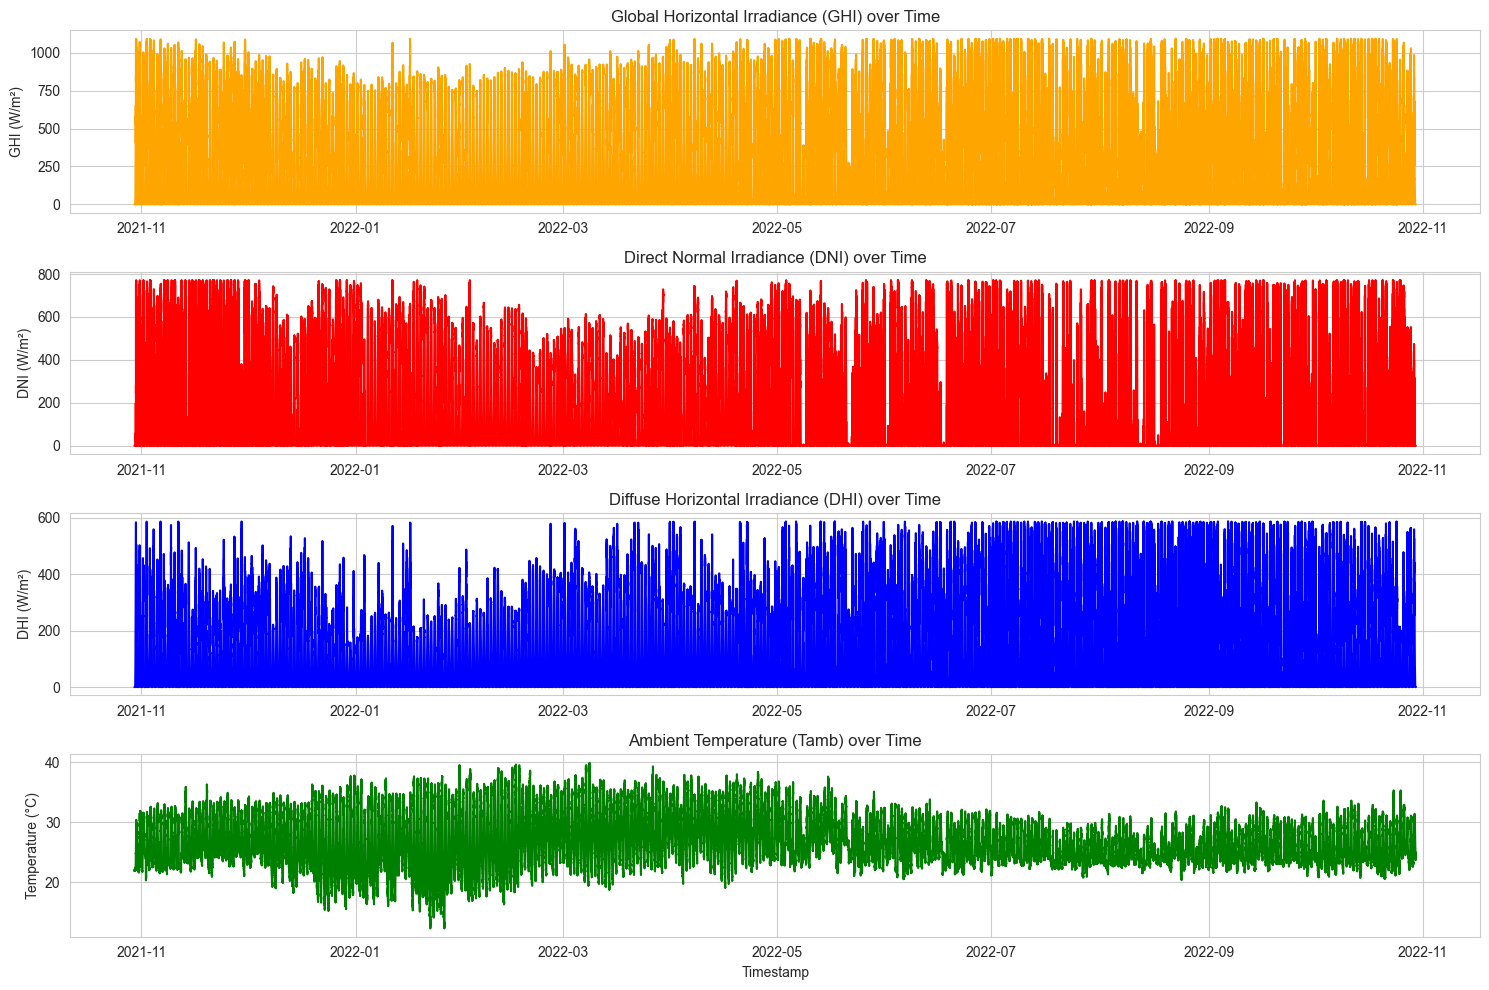

In [16]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Plot GHI
plt.subplot(4, 1, 1)
sns.lineplot(x='Timestamp', y='GHI', data=df, color='orange')
plt.title('Global Horizontal Irradiance (GHI) over Time')
plt.xlabel('')
plt.ylabel('GHI (W/m²)')

# Plot DNI
plt.subplot(4, 1, 2)
sns.lineplot(x='Timestamp', y='DNI', data=df, color='red')
plt.title('Direct Normal Irradiance (DNI) over Time')
plt.xlabel('')
plt.ylabel('DNI (W/m²)')

# Plot DHI
plt.subplot(4, 1, 3)
sns.lineplot(x='Timestamp', y='DHI', data=df, color='blue')
plt.title('Diffuse Horizontal Irradiance (DHI) over Time')
plt.xlabel('')
plt.ylabel('DHI (W/m²)')

# Plot Ambient Temperature (Tamb)
plt.subplot(4, 1, 4)
sns.lineplot(x='Timestamp', y='Tamb', data=df, color='green')
plt.title('Ambient Temperature (Tamb) over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()

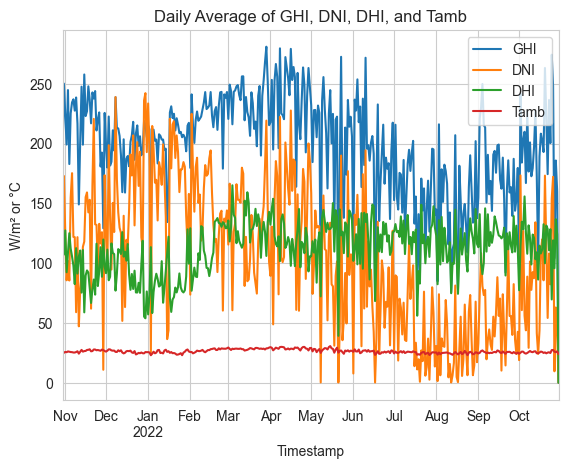

In [19]:
daily_avg = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('D').mean()
daily_avg.plot()
plt.title('Daily Average of GHI, DNI, DHI, and Tamb')
plt.ylabel('W/m² or °C')
plt.grid(True)
plt.show()

C:\Users\mesay\AppData\Local\Temp\ipykernel_25260\808198780.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample("M").mean()


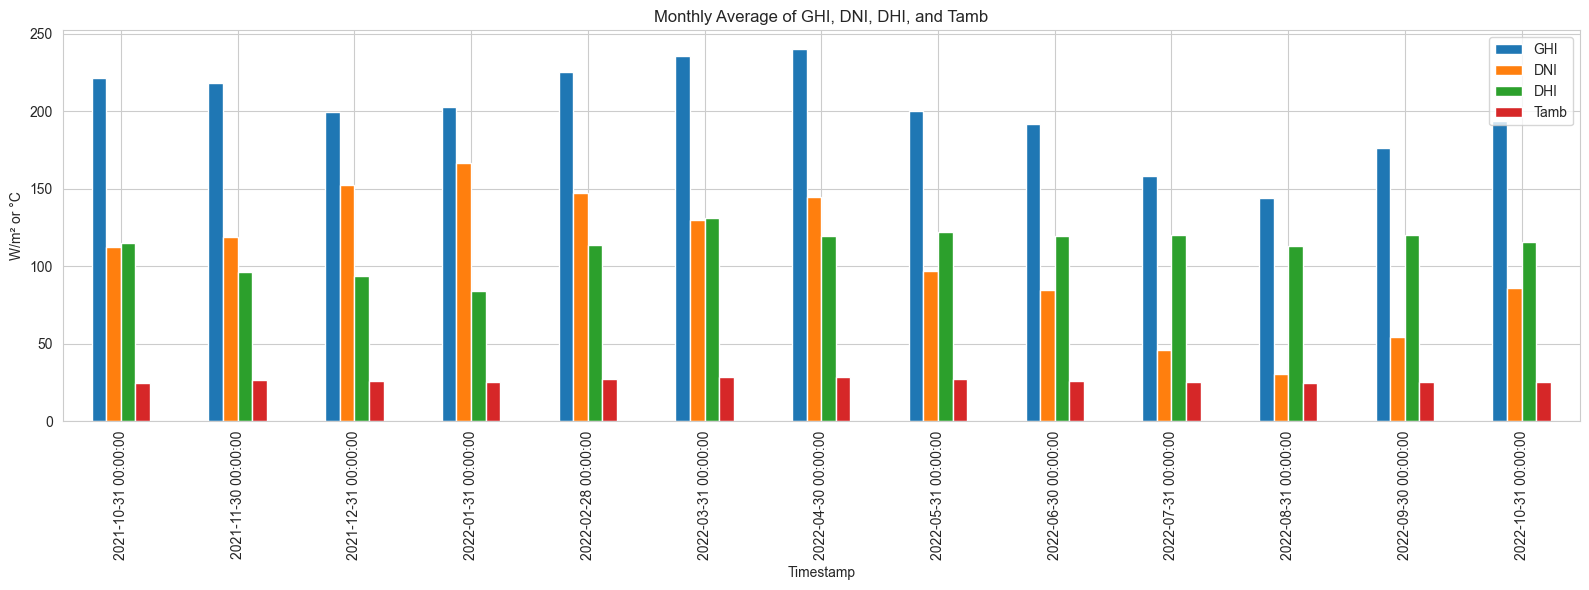

In [20]:
monthly_avg = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample("M").mean()
monthly_avg.plot(kind='bar', figsize=(16, 6))
plt.title('Monthly Average of GHI, DNI, DHI, and Tamb')
plt.ylabel('W/m² or °C')
plt.grid(True)
plt.tight_layout()
plt.show()


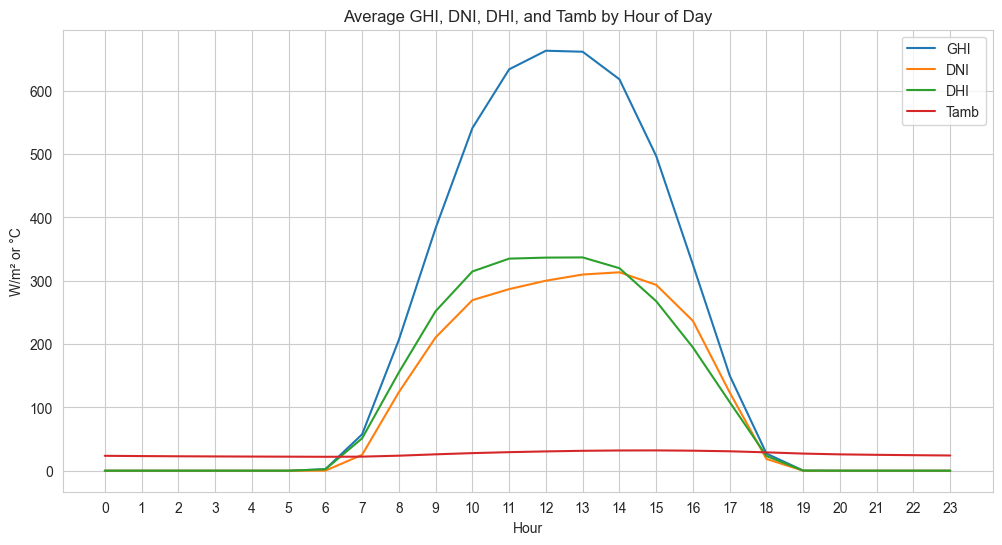

In [21]:
df['hour'] = df.index.hour
hourly_avg = df.groupby('hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
hourly_avg.plot(figsize=(12, 6))
plt.title('Average GHI, DNI, DHI, and Tamb by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('W/m² or °C')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

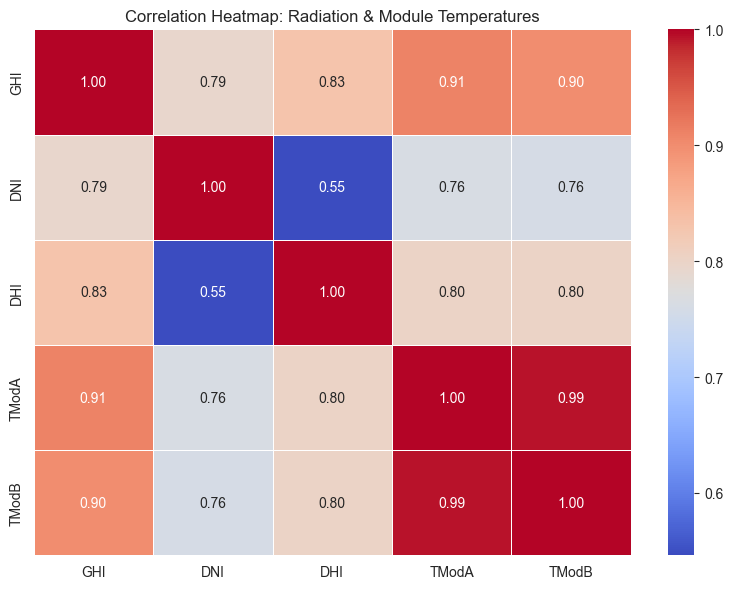

In [22]:
# Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr_matrix = df[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Radiation & Module Temperatures')
plt.tight_layout()
plt.show()

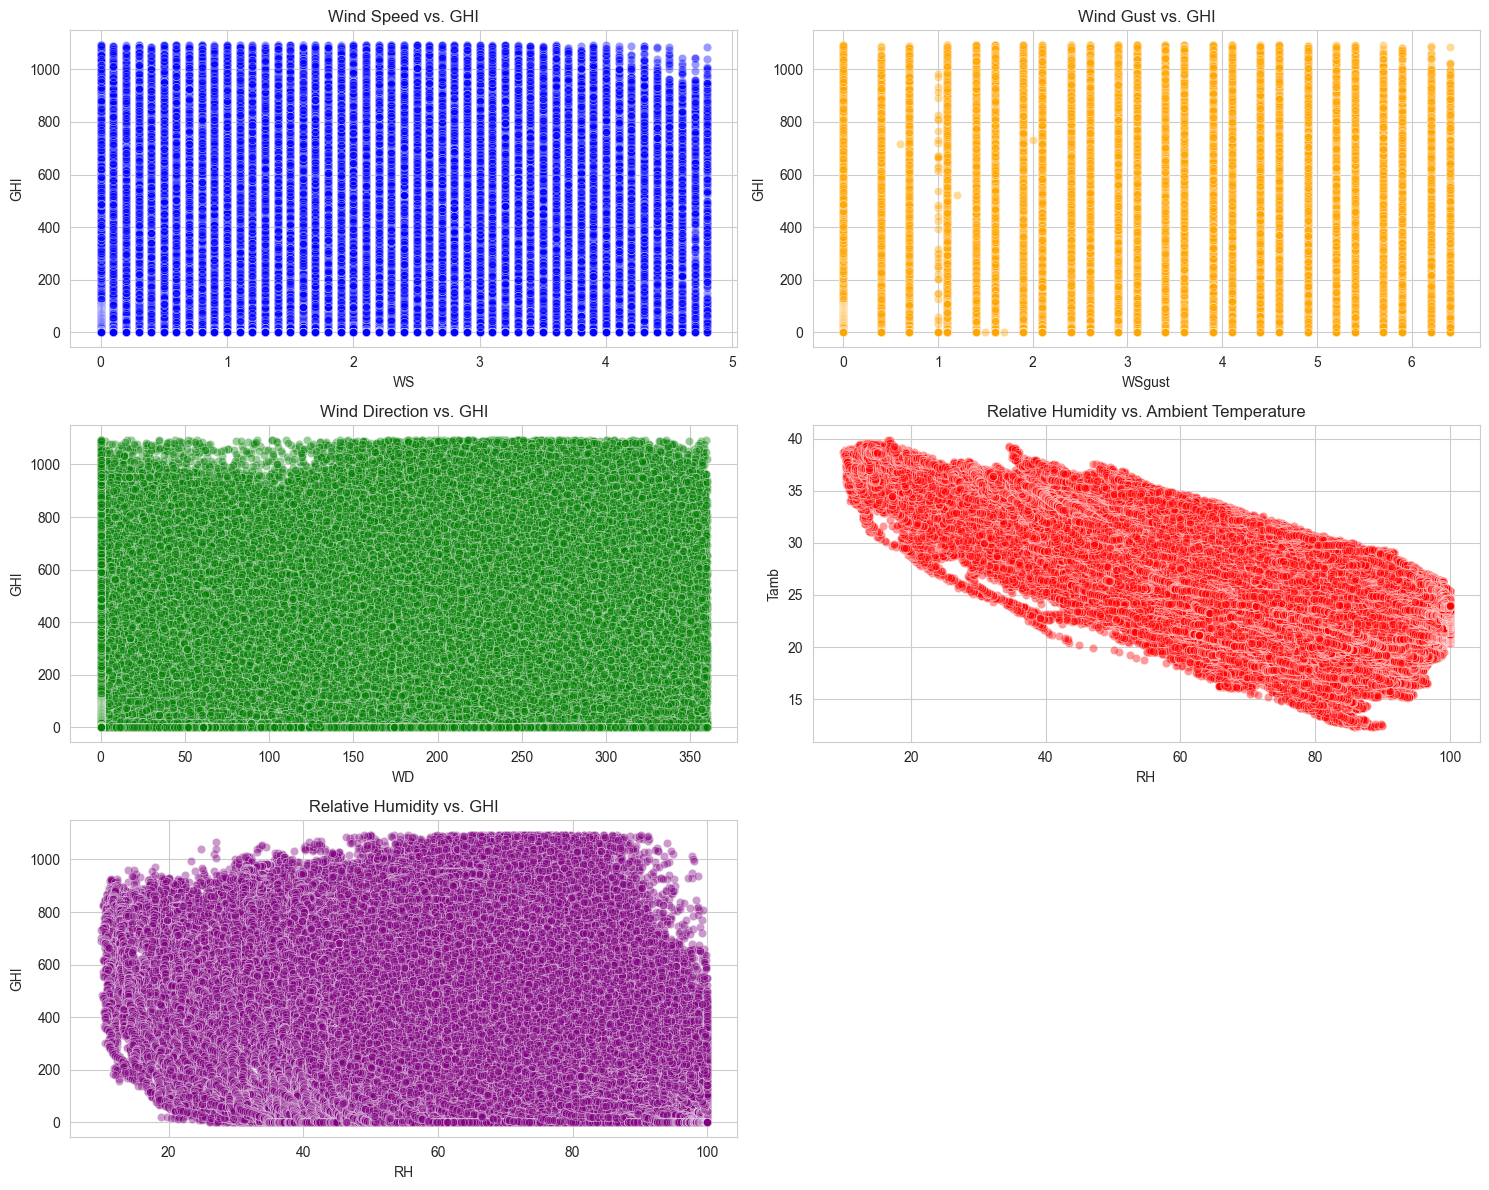

In [23]:
# Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI

sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

# 1. WS vs GHI
plt.subplot(3, 2, 1)
sns.scatterplot(data=df, x='WS', y='GHI', alpha=0.4, color='blue')
plt.title('Wind Speed vs. GHI')

# 2. WSgust vs GHI
plt.subplot(3, 2, 2)
sns.scatterplot(data=df, x='WSgust', y='GHI', alpha=0.4, color='orange')
plt.title('Wind Gust vs. GHI')

# 3. WD vs GHI
plt.subplot(3, 2, 3)
sns.scatterplot(data=df, x='WD', y='GHI', alpha=0.4, color='green')
plt.title('Wind Direction vs. GHI')

# 4. RH vs Tamb
plt.subplot(3, 2, 4)
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.4, color='red')
plt.title('Relative Humidity vs. Ambient Temperature')

# 5. RH vs GHI
plt.subplot(3, 2, 5)
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.4, color='purple')
plt.title('Relative Humidity vs. GHI')

plt.tight_layout()
plt.show()

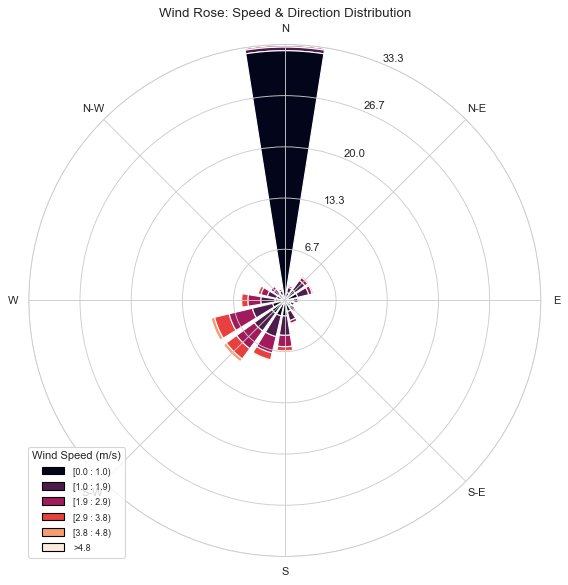

In [24]:
# Wind & Distribution Analysis

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title="Wind Speed (m/s)")
plt.title('Wind Rose: Speed & Direction Distribution')
plt.show()

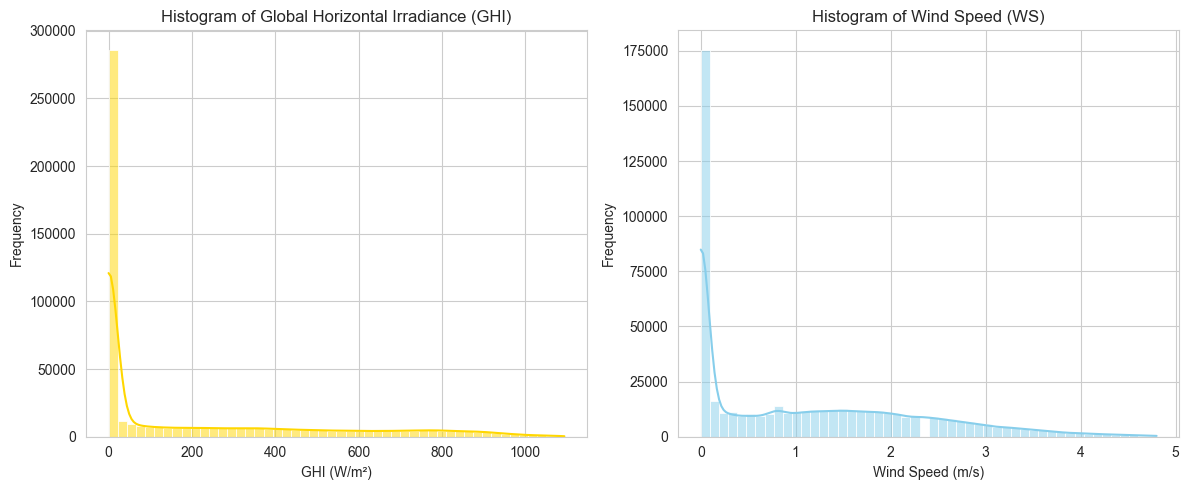

In [25]:
# Histograms for GHI and one other variable (e.g. WS).
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

# Histogram for GHI
plt.subplot(1, 2, 1)
sns.histplot(df['GHI'].dropna(), bins=50, kde=True, color='gold')
plt.title('Histogram of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS (Wind Speed)
plt.subplot(1, 2, 2)
sns.histplot(df['WS'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

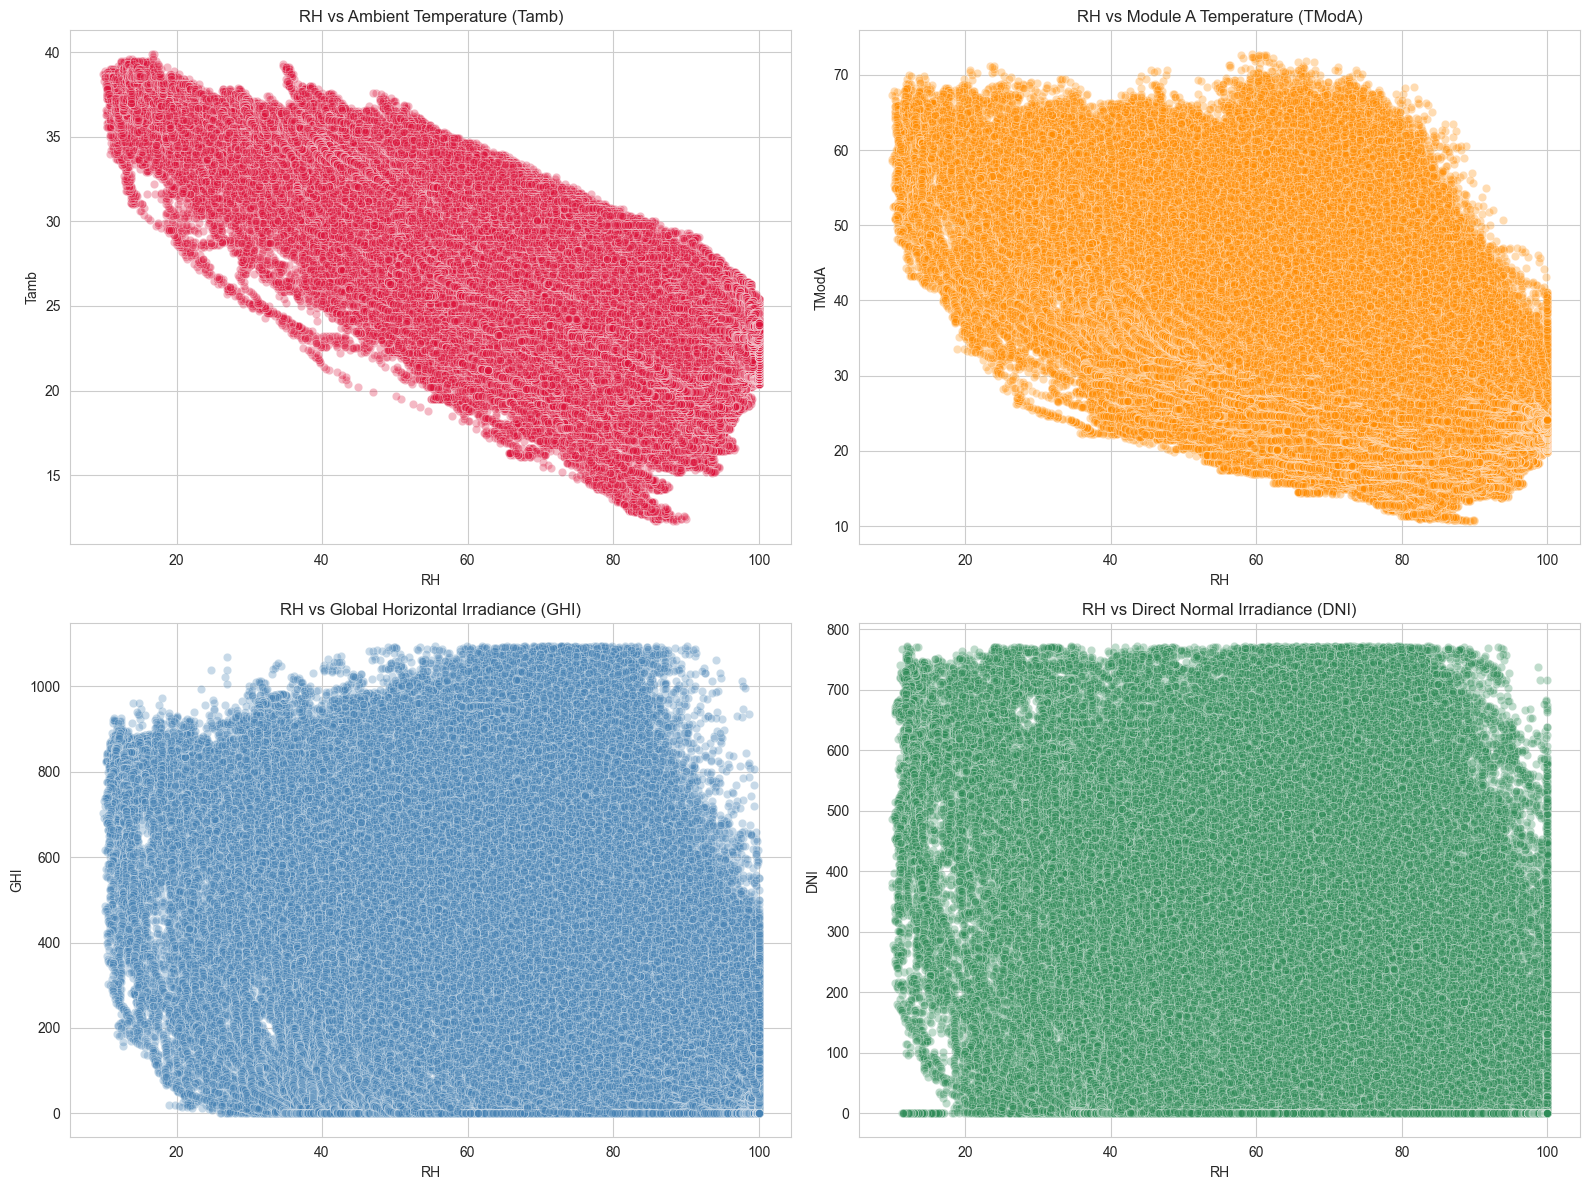

In [26]:
# Temperature Analysis
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

# RH vs Tamb
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.3, color='crimson')
plt.title('RH vs Ambient Temperature (Tamb)')

# RH vs TModA
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='RH', y='TModA', alpha=0.3, color='darkorange')
plt.title('RH vs Module A Temperature (TModA)')

# RH vs GHI
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.3, color='steelblue')
plt.title('RH vs Global Horizontal Irradiance (GHI)')

# RH vs DNI
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='RH', y='DNI', alpha=0.3, color='seagreen')
plt.title('RH vs Direct Normal Irradiance (DNI)')

plt.tight_layout()
plt.show()


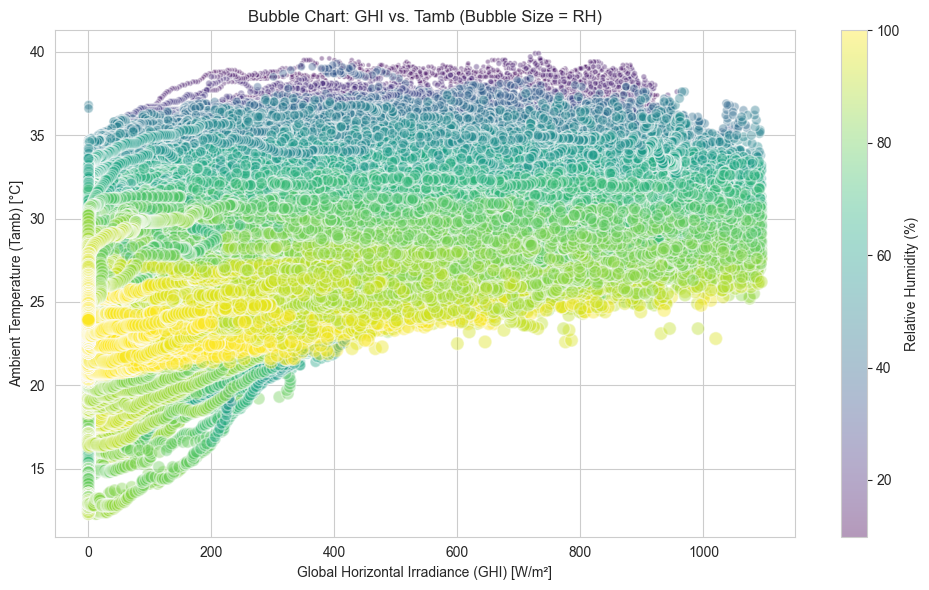

In [27]:
# Bubble Chart: GHI vs Tamb 
plt.figure(figsize=(10, 6))
plt.scatter(
    df['GHI'],
    df['Tamb'],
    s=df['RH'],       
    c=df['RH'],       
    cmap='viridis',
    alpha=0.4,
    edgecolors='w'
)

plt.xlabel('Global Horizontal Irradiance (GHI) [W/m²]')
plt.ylabel('Ambient Temperature (Tamb) [°C]')
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.colorbar(label='Relative Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()